In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
def true_function(x):
    return x**2 * np.sin(x)

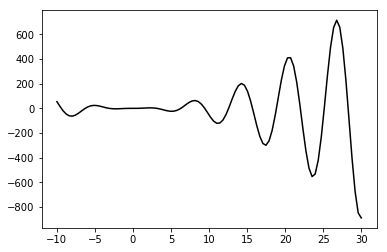

In [109]:
x = np.linspace(-10, 30, 100)
y = true_function(x)

plt.plot(x, y, '-', color='k')

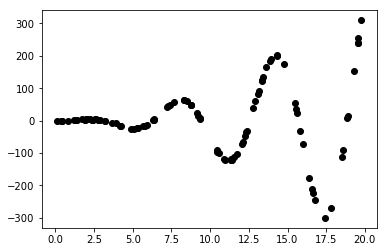

In [111]:
# 訓練データの生成
rs = np.random.RandomState(0)
x_train = rs.rand(100) * 20
y_train = true_function(x_train) + rs.normal(0, 1, 100)

plt.plot(x_train, y_train, 'o', color='k')

In [95]:
def x_M(x, M):
    return np.r_[[x ** m for m in range(M)]].T

In [112]:
X = x_M(x_train, M)
X.shape

(100, 4)

In [116]:
# モデルパラメータ
M = 8 # モデルの次元数
lambda_ = 1 # ノイズ成分の精度パラメータ
A = 1 # パラメータwの事前分布の精度パラメータ
m = 0 # パラメータwの事前分布の平均パラメータ

X = x_M(x_train, M)

# wの事後分布の計算
A_hat = lambda_ * np.dot(X.T, X) + A * np.identity(X.shape[1])
m_hat = lambda_ * np.dot(np.dot(np.linalg.inv(A_hat), X.T), y_train) + m

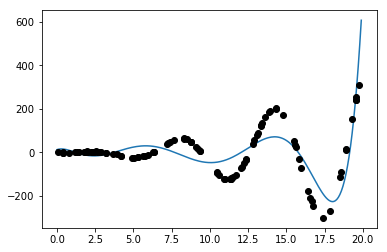

In [117]:
x_list = np.arange(0, 20, 0.1)
y_list =[np.dot(m_hat.T, x) for x in x_M(x_list,M)]

plt.plot(x_list, y_list)
plt.plot(x_train, y_train, 'o', color='k')

In [49]:
# 基底関数　ガウス関数
def phi(x):
    s = 0.5 # ガウス基底の幅
    return np.append(1, np.exp(-(x - np.arange(0, 1+s,s))**2 / (2 * s * s)))

In [40]:
# scikit-learn
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [118]:
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(random_state=0).fit(x_train.reshape(-1,1), y_train)

In [119]:
gpr.score(x_train.reshape(-1,1), y_train)

0.9999594519087445

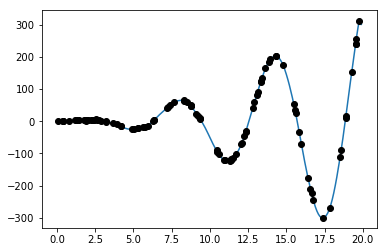

In [121]:
x_list = np.arange(0, 20, 0.1)
y_list =gpr.predict(x_list.reshape(-1, 1))

plt.plot(x_list, y_list)
plt.plot(x_train, y_train, 'o', color='k')